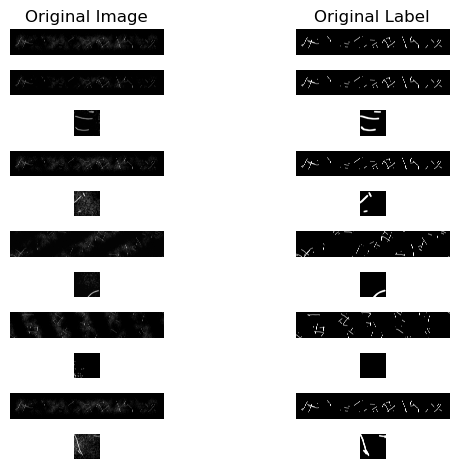

In [2]:
import cv2
import json5
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

patch_size = 512 

# Define the path to your image file
image_path = '/Users/karan/microsegmentation/DemoData/Images/image-2.png'
label_path = '/Users/karan/microsegmentation/DemoData/Masks/image-2.png'
config_path = '/Users/karan/microsegmentation/segmentation/configs/config/augmentation.json5'

# Load the image/label
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError(f"Image at {image_path} not found or is not valid.")
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
if label is None:
    raise ValueError(f"Image at {label_path} not found or is not valid.")

# Load the JSON5 configuration
with open(config_path, 'r') as file:
    transform_config = json5.load(file)

# Build the list of transformations
transform_list = []
for item in transform_config['transforms']: #type: ignore
    transform_type = item['name']
    params = item.get('params', {})
    try:
        transform_class = getattr(A, transform_type)
        transform = transform_class(**params)
        transform_list.append(transform)
    except AttributeError:
        print(f"Warning: Transformation '{transform_type}' not found in Albumentations.")
    except Exception as e:
        print(f"Error applying transformation '{transform_type}': {e}")

transform_list.append(A.Normalize(mean=(0.5,), std=(0.5,), max_pixel_value=255.0))

# Compose the augmentations
augmentation = A.Compose(transform_list)

# Apply the augmentations multiple times
num_augmentations = 5
fig, ax = plt.subplots(2*num_augmentations + 1, 2)

ax = ax.reshape((-1,2))

# Display the original image/label
ax[0,0].imshow(image, cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(label, cmap='gray')
ax[0,1].set_title('Original Label')
ax[0,1].axis('off')

# Display augmented images
for i in range(1, num_augmentations + 1):
    augmented = augmentation(image=image, mask=label)
    cropped_augmented = A.RandomCrop(height=patch_size, width=patch_size)(image=augmented['image'], mask=augmented['mask'])

    augmented_image = augmented['image']
    augmented_label = augmented['mask']

    ax[2*i-1,0].imshow(augmented_image, cmap='gray')
    ax[2*i-1,0].axis('off')

    ax[2*i-1,1].imshow(augmented_label, cmap='gray')
    ax[2*i-1,1].axis('off')

    ax[2*i,0].imshow(cropped_augmented['image'], cmap='gray')
    ax[2*i,0].axis('off')

    ax[2*i,1].imshow(cropped_augmented['mask'], cmap='gray')
    ax[2*i,1].axis('off')

plt.tight_layout()
plt.show()

